# 01. Importing Libraries

In [1]:
#Import Libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# 02. Importing Dataframe

In [2]:
# Create a string path

path = r'C:\Users\rasmu\Documents\CareerFoundry\A4 Instacart Basket Analysis\02 Data'

In [3]:
# Importing Dataframe

ords_prods_merge = pd.read_pickle(os.path.join(path, 'Prepd Data', 'ords_prods_merge.pkl'))

# 03. Creating Bar Charts

<AxesSubplot:>

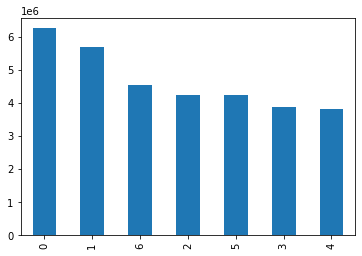

In [4]:
# Creating a bar chart

ords_prods_merge['orders_day_of_week'].value_counts().plot.bar()

<AxesSubplot:>

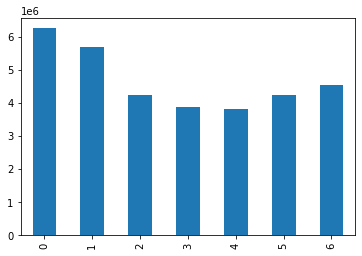

In [5]:
# Sort by index

ords_prods_merge['orders_day_of_week'].value_counts().sort_index().plot.bar()

<AxesSubplot:>

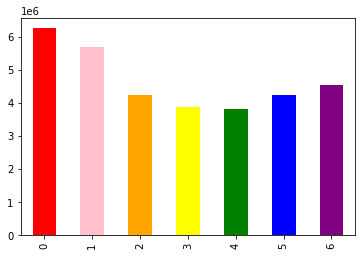

In [6]:
# adding color

ords_prods_merge['orders_day_of_week'].value_counts().sort_index().plot.bar(color = ['red', 'pink', 'orange', 'yellow', 'green', 'blue', 'purple' ])

# 04. Exporting Charts

In [7]:
# new path needed

path = r'C:\Users\rasmu\Documents\CareerFoundry\A4 Instacart Basket Analysis'

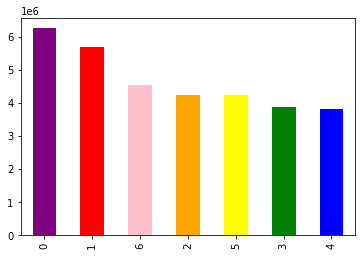

In [8]:
# create bar object

bar = ords_prods_merge['orders_day_of_week'].value_counts().plot.bar(color =['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])

In [9]:
# create/export chart figure

bar.figure.savefig(os.path.join(path, '04 Analysis','Viz', 'bar_orders_dow.png'))

# 05. Creating Histograms & Scatterplots

<AxesSubplot:ylabel='Frequency'>

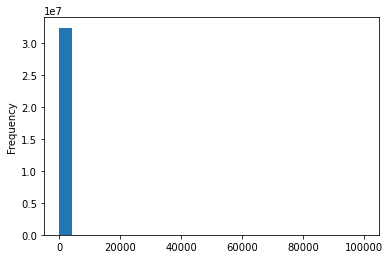

In [10]:
# Creating a prices histogram

ords_prods_merge['prices'].plot.hist(bins = 25)

In [11]:
# Data consistency check

ords_prods_merge['prices'].describe()

count    3.240486e+07
mean     1.198023e+01
std      4.956554e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      9.999900e+04
Name: prices, dtype: float64

In [12]:
ords_prods_merge['prices'].mean()

11.980225638676366

In [13]:
ords_prods_merge['prices'].median()

7.4

In [14]:
ords_prods_merge['prices'].max()

99999.0

<AxesSubplot:xlabel='prices', ylabel='prices'>

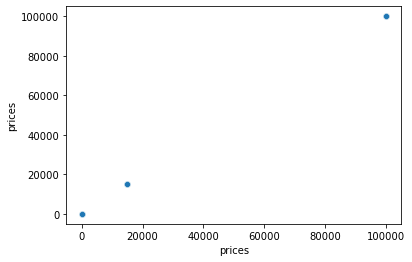

In [15]:
# creating a scatterplot

sns.scatterplot(x = 'prices', y = 'prices',data = ords_prods_merge)

In [16]:
# Checking for outliers over $100 cost

ords_prods_merge.loc[ords_prods_merge['prices'] > 100]

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,first_order,product_id,add_to_cart_order,reordered,...,_merge,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_price,spending_flag,order_frequency,frequency_flag
1592,912404,17,12,2,14,5.0,False,21553.0,5.0,0.0,...,both,Regularly busy,Regularly busy,Most Orders,41,Loyal customer,108.648299,High spender,5.0,Frequent customer
1654,603376,17,22,6,16,4.0,False,21553.0,3.0,1.0,...,both,Regularly busy,Regularly busy,Most Orders,41,Loyal customer,108.648299,High spender,5.0,Frequent customer
16668,3264360,135,2,2,21,13.0,False,21553.0,6.0,0.0,...,both,Regularly busy,Regularly busy,Average Orders,5,New customer,1154.792308,High spender,12.0,Regular customer
16674,892534,135,3,0,8,12.0,False,21553.0,3.0,1.0,...,both,Busiest day,Busiest days,Average Orders,5,New customer,1154.792308,High spender,12.0,Regular customer
54053,229704,342,8,1,19,30.0,False,21553.0,9.0,0.0,...,both,Regularly busy,Busiest days,Average Orders,17,Regular customer,114.426619,High spender,23.0,Non-frequent customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556283,3172853,205650,18,1,9,7.0,False,21553.0,17.0,1.0,...,both,Regularly busy,Busiest days,Most Orders,26,Regular customer,351.141618,High spender,6.0,Frequent customer
32583684,2504315,205818,3,5,15,3.0,False,21553.0,13.0,0.0,...,both,Regularly busy,Regularly busy,Most Orders,26,Regular customer,170.073770,High spender,12.0,Regular customer
32583694,1108388,205818,5,4,5,1.0,False,21553.0,5.0,1.0,...,both,Least busy,Slowest days,Fewest Orders,26,Regular customer,170.073770,High spender,12.0,Regular customer
32616755,1916142,206049,1,2,17,NaN,True,21553.0,2.0,0.0,...,both,Regularly busy,Regularly busy,Average Orders,6,New customer,938.031250,High spender,7.0,Frequent customer


In [17]:
# turn these values into missing (NaN)

ords_prods_merge.loc[ords_prods_merge['prices'] >100, 'prices'] = np.nan

In [18]:
# did NaN work?

ords_prods_merge['prices'].max()

25.0

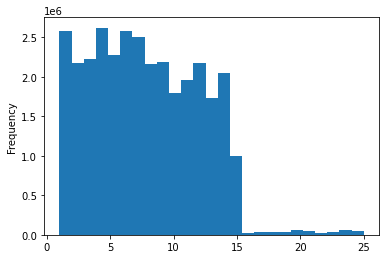

In [20]:
# retrying the histogram

hist = ords_prods_merge['prices'].plot.hist(bins = 25)

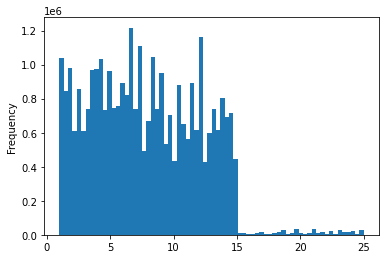

In [21]:
# increasing the granularity

hist_2 = ords_prods_merge['prices'].plot.hist(bins = 70)

In [23]:
# exporting the histogram

hist_2.figure.savefig(os.path.join(path, '04 Analysis','Viz', 'hist_prices.png'))

# 06. Creating Line Charts / Sampling Data

In [24]:
# creating a 70/30 data sample

np.random.seed(4)
dev = np.random.rand(len(ords_prods_merge)) <= 0.7

In [25]:
dev

array([False,  True, False, ...,  True, False,  True])

In [26]:
# example of what np.random.rand does:

np.random.rand(10)

array([0.79227379, 0.54149571, 0.53109233, 0.3016315 , 0.91662146,
       0.90125835, 0.66776966, 0.2148013 , 0.31056132, 0.19891516])

In [27]:
# Create a list holding True/False values to the test np.random.rand() <= 0.7 

np.random.seed(4)
dev = np.random.rand(len(ords_prods_merge)) <= 0.7

In [28]:
# Store 70% of the sample in the dataframe big

big = ords_prods_merge[dev]

In [29]:
# Store 30% of the sample in the dataframe small

small = ords_prods_merge[~dev]

In [30]:
# Checking that results of sampling worked by comparing len() totals

len(ords_prods_merge)

32641268

In [31]:
len(big) + len(small)

32641268

In [33]:
# Creating a sample of only the columns we need

df_2 = small[['orders_day_of_week','prices']]

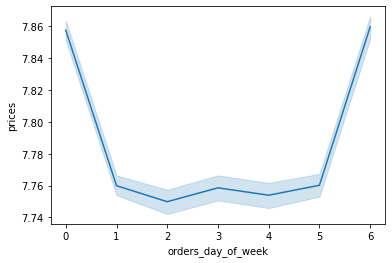

In [34]:
# CREATING THE LINE CHART

line = sns.lineplot(data = df_2, x = 'orders_day_of_week',y = 'prices')

In [35]:
df_4 = big[['orders_day_of_week', 'prices']]

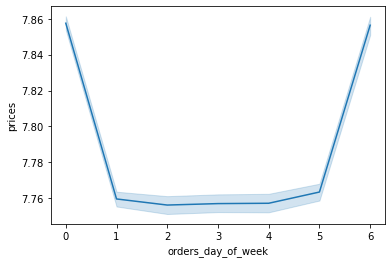

In [36]:
line_2 = sns.lineplot(data = df_4, x = 'orders_day_of_week', y = 'prices')